In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds=pd.read_csv('haberman.csv',header=None)
ds.columns = ['Age', 'YearOfOperation','AxillaryNodes', 'SurvivalStatus']
ds.head()

,Age,YearOfOperation,AxillaryNodes,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
Training_data= ds[(ds['YearOfOperation'] >= 58) & (ds['YearOfOperation'] <= 65)]
Testing_data= ds[ds['YearOfOperation'] > 65]
print('count \nTraining data:',len(Training_data),'\nTesting data:',len(Testing_data))

count 
Training data: 229 
Testing data: 77


In [4]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
X_train=Training_data.iloc[:,0:3].values
y_train=Training_data.iloc[:,3].values
X_test=Testing_data.iloc[:,0:3].values
y_test=Testing_data.iloc[:,3].values

### plotting diagram for classification

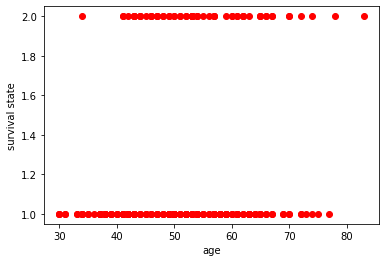

In [15]:
X_age=Training_data.iloc[:,0:1].values
plt.xlabel('age')
plt.ylabel('survival state')
dia=plt.scatter(X_age, y_train, color = 'red')

<IPython.core.display.Javascript object>


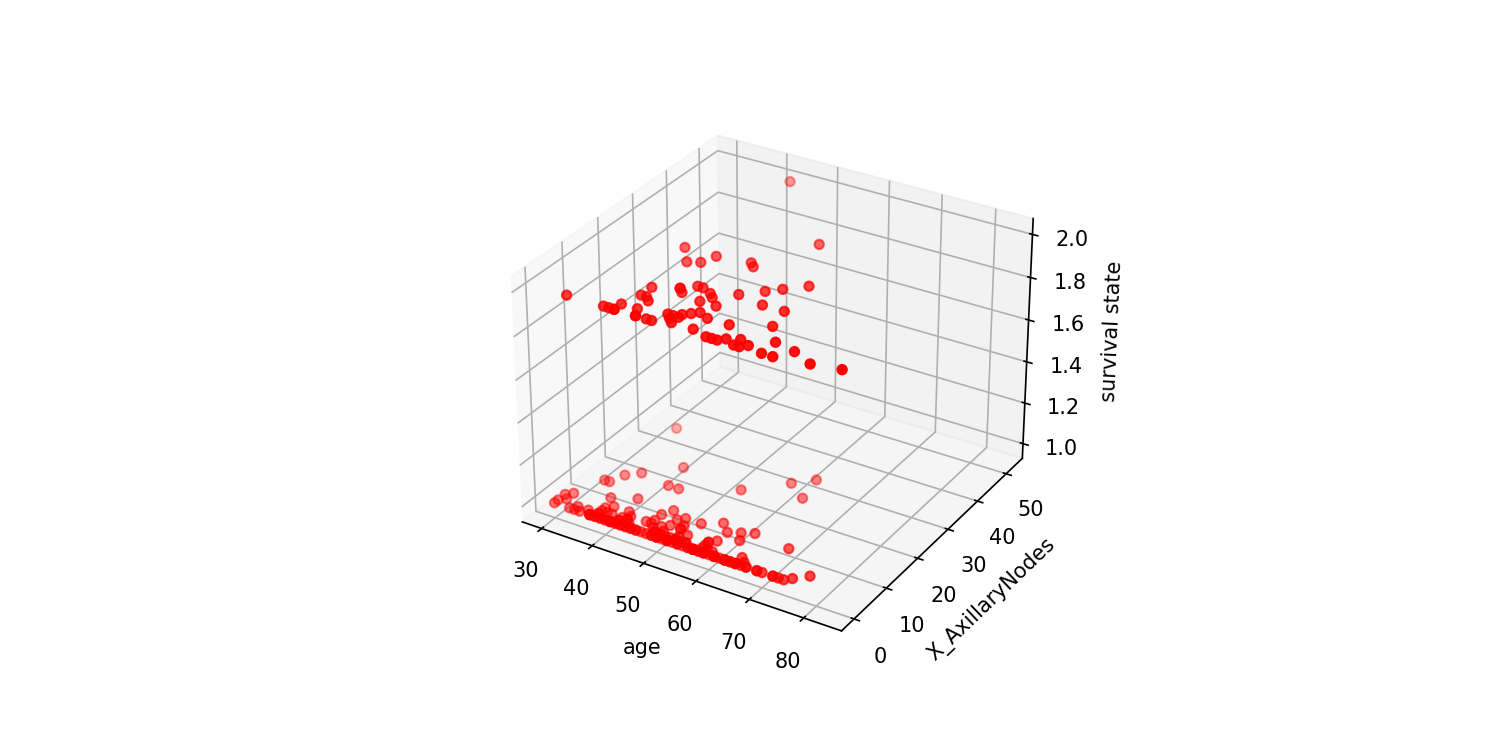

Text(0.5, 0, 'survival state')

In [17]:
%matplotlib notebook
X_age=Training_data.iloc[:,0:1].values
X_AxillaryNodes=Training_data.iloc[:,2:3].values
SurvivalState=Training_data.iloc[:,3].values
plt.figure(figsize=(10,5))
ax=plt.axes(projection='3d')
ax.scatter3D(X_age,X_AxillaryNodes,SurvivalState,c='red')
ax.set_xlabel('age')
ax.set_ylabel('X_AxillaryNodes')
ax.set_zlabel('survival state')

In [8]:
clf = Perceptron(tol=1e-3, random_state=0) 
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.7729257641921398

In [66]:
y_pred=clf.predict(X_test)
clf.score(X_test, y_pred)

1.0

In [67]:
confusion_matrix(y_test,y_pred)

array([[56,  4],
       [13,  4]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.93      0.87        60
           2       0.50      0.24      0.32        17

    accuracy                           0.78        77
   macro avg       0.66      0.58      0.59        77
weighted avg       0.74      0.78      0.75        77

